<center>

*******************************************************************************************

### Phase-Locking Value

##### 27 December 2024

##### Juan Ignacio Mendoza Garay  

*******************************************************************************************

</center>

##### INFORMATION:

* "Phase-locking value" is a measure for synchrony of two or more periodic or recurrent signals. In this context, synchrony is defined as a stable phase difference, either in a short lapse of time, or across a number of trials or conditions.

>
* References:
  
    * Lachaux, J. P., Rodriguez, E., Martinerie, J., & Varela, F. J. (1999). Measuring phase synchrony in brain signals. *Human brain mapping, 8*(4), 194-208. https://doi.org/10.1002/(SICI)1097-0193(1999)8:4%3C194::AID-HBM4%3E3.0.CO;2-C
 
    *  Mormann, F., Lehnertz, K., David, P., & Elger, C. E. (2000). Mean phase coherence as a measure for phase synchronization and its application to the EEG of epilepsy patients. *Physica D: Nonlinear Phenomena, 144*(3-4), 358-369. https://doi.org/10.1016/S0167-2789(00)00087-7

    * Bruña, R., Maestú, F., & Pereda, E. (2018). Phase locking value revisited: teaching new tricks to an old dog. *Journal of neural engineering, 15*(5), 056011. https://doi.org/10.1088/1741-2552/aacfe4

>
* Instructions:

    Edit the values indicated with an arrow like this: <---\
    To test different methods, comment or uncomment the lines indicated with an arrow like this: <===\
    Run the program, close your eyes and hope for the best.  

*******************************************************************************************

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

***
#### Test signals:
Simulation of the speed of two oscillating points extracted from a video recording.

length =  600


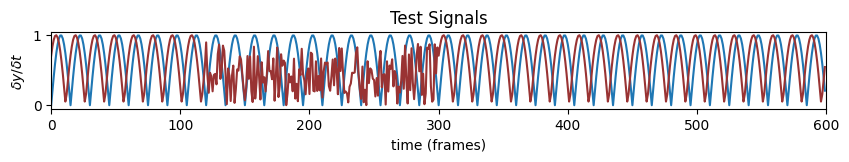

In [2]:
f = 1        # <--- frequency (Hz)
s = np.pi/2  # <--- 2nd. signal phase shift
fac_fuzz = [.2,.5] # <--- 2nd. signal start and end of fuzziness (factor)
fps = 30     # <--- sampling frequency
l = fps * 20 # <--- duration

colours = [None,[0.6,0.2,0.2]]
i_fuzz = [round(v*l) for v in fac_fuzz]
t = np.arange(0, l) / fps  # grid
ps = 0
test_signals = []
plt.figure(figsize=(10,1))
for i in range(2):
    if i==1: ps = s
    y = np.sin(2*np.pi*f*t + ps/2)
    if i==1: y[i_fuzz[0]:i_fuzz[1]] = np.random.uniform(0.9,-0.9,i_fuzz[1]-i_fuzz[0])
    y = np.sqrt( y**2 )
    test_signals.append(y)
    plt.plot(y,color=colours[i])
    plt.xlim((0,l))
plt.ylabel('$\delta y / \delta t$')
plt.xlabel('time (frames)')
plt.title('Test Signals')
print('length = ',l)

***
#### Phase angles at different frequencies:

length = 571
bins = 14


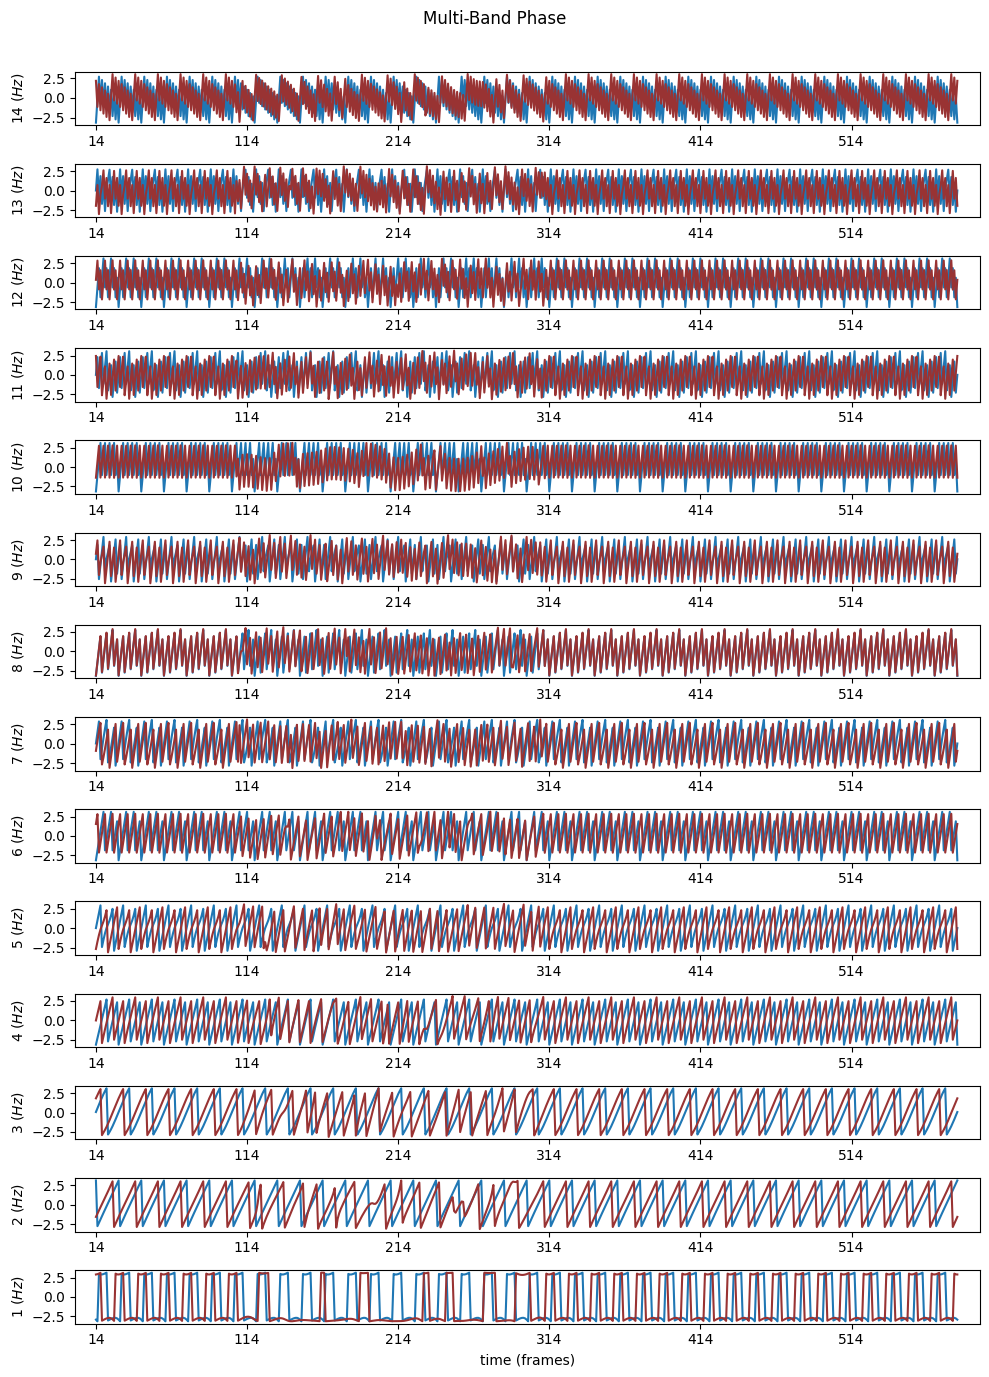

In [3]:
fft_window_size = 30 # <--- window size for FFT

from scipy.signal.windows import hann as fft_window # <--- window shape (see SciPy documentation)
w = fft_window(fft_window_size)
phase_angles = []
odd_bit = fft_window_size % 2
i_max_bin = round(fft_window_size/2)+odd_bit
for i_sig in range(2):
    phase_angles.append([])
    i_w = 0
    while i_w <= (l-fft_window_size):
        this_window = test_signals[i_sig][ i_w : i_w+fft_window_size] * w
        this_spectrum = fft(this_window)
        this_spectrum_trimmed = this_spectrum[1:i_max_bin] # remove f(0) (DC offset) and symmetric part
        these_angles = np.angle(this_spectrum_trimmed)
        phase_angles[i_sig].append(these_angles) 
        i_w += 1
    phase_angles[i_sig] = np.array(phase_angles[i_sig])
    
bin_freq_diff = fps/fft_window_size
bin_frequencies = [b*bin_freq_diff for b in range(1,i_max_bin)]    
n_bins = len(bin_frequencies)
this_l = len(phase_angles[0][:,0])
print(f'length = {this_l}\nbins = {n_bins}')
margin = round((l-this_l)/2)
plt.figure(figsize=(10,n_bins))
for i_bin in range(n_bins):
    a_1 = phase_angles[0][:,i_bin]
    a_2 = phase_angles[1][:,i_bin]
    i_bin_rev = n_bins-i_bin
    plt.subplot(n_bins,1,i_bin_rev)
    plt.plot(a_1)
    plt.plot(a_2,color=colours[1])
    xtick_loc,_ = plt.xticks()
    plt.xticks(xtick_loc,[int(v+margin) for v in xtick_loc])
    plt.ylabel(rf'{bin_frequencies[i_bin]:g} $(Hz)$')
    plt.xlim((-margin,this_l+margin))
    if i_bin == 0:
        plt.xlabel('time (frames)')
plt.suptitle('Multi-Band Phase\n\n');
plt.tight_layout()

***
#### Phase difference between the two signals:

length = 571


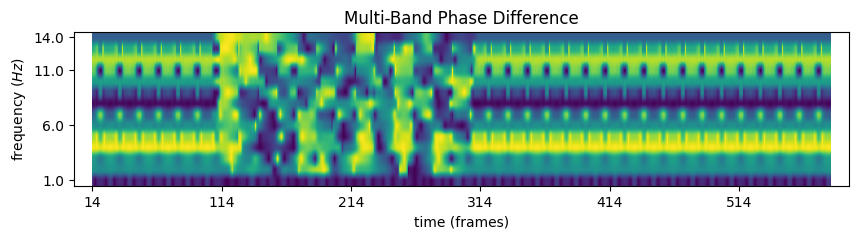

In [4]:
def phase_diff(phi_1,phi_2):
    '''Phase difference of angles (in radians) using trigonometry.'''
    return np.arctan2( np.cos(phi_1) * np.sin(phi_2) - np.sin(phi_1) * np.cos(phi_2), 
                       np.cos(phi_1) * np.cos(phi_2) + np.sin(phi_1) * np.sin(phi_2) )
phase_difference = []
phase_difference_ = []
for i_w in range(len(phase_angles[0])):
    a_1 = phase_angles[0][i_w,:]
    a_2 = phase_angles[1][i_w,:]
    p_diff = phase_diff(a_1,a_2) # trigonometric difference
    phase_difference.append(p_diff)
    p_diff_ = a_1 - a_2 # simple difference
    phase_difference_.append(p_diff_)
phase_difference = np.array(phase_difference)
phase_difference_ = np.array(phase_difference_)

this_l = phase_difference.shape[0]
print('length =',this_l)
margin = round((l-this_l)/2)
plt.figure(figsize=(10,2))
plt.imshow(abs(phase_difference.T),aspect='auto') # <=== trigonometric difference
# plt.imshow(abs(phase_difference_.T),aspect='auto') # <=== simple difference
yticks_loc,_ = plt.yticks()
yticks_loc_new = yticks_loc
yticks_loc_new = [int(i) for i in yticks_loc_new if i >=0 and i< len(bin_frequencies)]
if n_bins not in yticks_loc_new: yticks_loc_new.append(n_bins-1)
yticks_lbl = [bin_frequencies[i] for i in yticks_loc_new]
plt.yticks(yticks_loc_new,yticks_lbl)
plt.ylabel('frequency $(Hz)$')
xtick_loc,_ = plt.xticks()
plt.xticks(xtick_loc,[int(v+margin) for v in xtick_loc])
plt.xlim((-margin,this_l+margin))
plt.gca().invert_yaxis()
plt.xlabel('time (frames)')
plt.title('Multi-Band Phase Difference');

***
#### Phase-Locking Value for the two signals:

length = 542


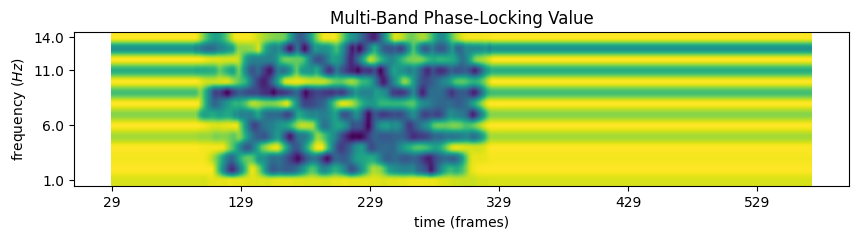

bin frequencies (Hz) = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]


In [5]:
PLV_window_size = 30 # <---

PLV = []
PLV_s = []
odd_bit = PLV_window_size % 2
i_w = 0
while i_w <= (phase_difference.shape[0]-PLV_window_size):
    # these_phase_diff = phase_difference[ i_w : i_w+PLV_window_size] # trigonometric difference
    these_phase_diff = phase_difference_[ i_w : i_w+PLV_window_size] # simple difference
    diff_complex = np.exp(complex(0,1)*(these_phase_diff))
    plv = np.abs(np.sum(diff_complex,axis=0))/diff_complex.shape[0]
    PLV.append(plv)
    i_w += 1
PLV = np.array(PLV)

this_l = PLV.shape[0]
print('length =',this_l)
margin = round((l-this_l)/2)
plt.figure(figsize=(10,2))
plt.imshow(PLV.T,aspect='auto')
plt.yticks(yticks_loc_new,yticks_lbl)
plt.ylabel('frequency $(Hz)$')
xtick_loc,_ = plt.xticks()
plt.xticks(xtick_loc,[int(v+margin) for v in xtick_loc])
plt.xlim((-margin,this_l+margin))
plt.gca().invert_yaxis()
plt.xlabel('time (frames)')
plt.title('Multi-Band Phase-Locking Value'); plt.show();
print('bin frequencies (Hz) =',bin_frequencies)

length = 542
effectively averaged frequency range = {1,10} (Hz)


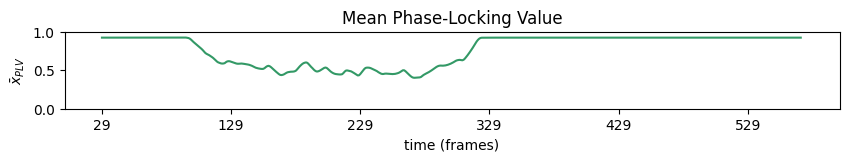

In [22]:
freq_range_average = [1,10] # <--- frequency range of bins to average (Hz)

i_range_bins_mean = []
for i in range(len(bin_frequencies)): 
    if bin_frequencies[i] >= freq_range_average[0]: i_range_bins_mean.append(i); break
for i in range(len(bin_frequencies)-1,0,-1): 
    if bin_frequencies[i] <= freq_range_average[1]: i_range_bins_mean.append(i); break
PLV_mean = np.mean(PLV[:, i_range_bins_mean[0] : i_range_bins_mean[1] ],axis=1)

this_l = PLV_mean.size
print('length =',this_l)
eff_freq_lbl = [bin_frequencies[i] for i in i_range_bins_mean]
print(f'effectively averaged frequency range = {{{eff_freq_lbl[0]:g},{eff_freq_lbl[1]:g}}} (Hz)')
margin = round((l-this_l)/2)
plt.figure(figsize=(10,1))
plt.plot(PLV_mean,color=[0.2,0.6,0.4])
plt.xlim((-margin,this_l+margin))
xtick_loc,_ = plt.xticks()
plt.xticks(xtick_loc,[int(v+margin) for v in xtick_loc])
plt.xlim((-margin,this_l+margin))
plt.ylim((0,1))
yticks_loc,_ = plt.yticks()
plt.yticks(yticks_loc)
plt.ylabel(r'$\bar{x}_{PLV}$')
plt.xlabel('time (frames)')
plt.title('Mean Phase-Locking Value');